In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import skimage
import matplotlib.patches as patches

In [2]:
# Width and height of each image.
img_size = 32

# Number of channels in each image, 3 channels: Red, Green, Blue.
num_channels = 3

# Length of an image when flattened to a 1-dim array.
img_size_flat = img_size * img_size * num_channels

# Number of classes.
num_classes = 10

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
def convert_images(raw):
    """
    Convert images from the CIFAR-10 format and
    return a 4-dim array with shape: [image_number, height, width, channel]
    where the pixels are floats between 0.0 and 1.0.
    """

    # Convert the raw images from the data-files to floating-points.
    raw_float = np.array(raw, dtype=float) / 255.0

    # Reshape the array to 4-dimensions.
    images = raw_float.reshape([-1, num_channels, img_size, img_size])

    # Reorder the indices of the array.
    images = images.transpose([0, 2, 3, 1])

    return images

In [5]:
def load_data(filename):
    """
    Load a pickled data-file from the CIFAR-10 data-set
    and return the converted images (see above) and the class-number
    for each image.
    """

    # Load the pickled data-file.
    data = unpickle(filename)

    # Get the raw images.
    raw_images = data[b'data']

    # Get the class-numbers for each image. Convert to numpy-array.
    cls = np.array(data[b'labels'])

    # Convert the images.
    images = convert_images(raw_images)

    return images, cls

In [6]:
file_path = "F:\IAS\WS19\CV1-1\exercise\cifar-10-batches-py"
files = ["\data_batch_1","\data_batch_2","\data_batch_3","\data_batch_4","\data_batch_5"]

In [7]:
images_batch, cls_batch = load_data(file_path+files[0])

In [85]:
images_batch[:,:,:,:].shape

(10000, 32, 32, 3)

In [9]:
cls_batch

array([6, 9, 9, ..., 1, 1, 5])

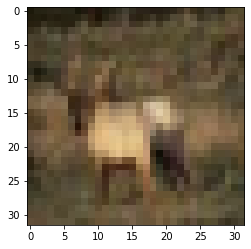

In [10]:
plt.imshow(images_batch[3,:,:,:])

In [11]:
cls_batch[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3])

In [109]:
def extract_n_images(n, class_batch, images_batch):
    a = 0
    d = 0
    s = 0
    automobile = np.empty([n,32,32,3])
    deer = np.empty([n,32,32,3])
    ship = np.empty([n,32,32,3])
    for i in range(len(class_batch)):
        if class_batch[i] == 1 and a != n:
            automobile[a,:,:,] = images_batch[i,:,:,]
            a+=1
        elif class_batch[i] == 4 and d != n:
            deer[d,:,:,:] = images_batch[i,:,:,]
            d+=1
        elif class_batch[i] == 8 and s != n:
            ship[s,:,:,:] = images_batch[i,:,:,]
            s+=1
    return automobile,deer, ship

In [110]:
automobile,deer,ship = extract_n_images(30, cls_batch, images_batch)

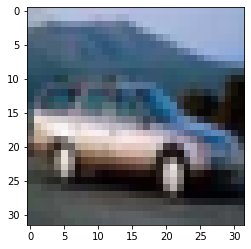

In [111]:
plt.imshow(automobile[0,:,:,:])

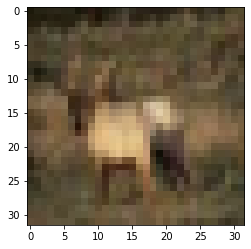

In [112]:
plt.imshow(deer[0,:,:,:])

In [42]:
new = (automobile[0,:,:,0]+automobile[0,:,:,1]+automobile[0,:,:,2]) / 3

In [98]:
def convert2gray(auto, deer, ship, n):
    auto_gray = np.empty([n,32,32])
    deer_gray = np.empty([n,32,32])
    ship_gray = np.empty([n,32,32])
    
    for i in range(len(auto)):
        auto_gray[i,:,:] = (auto[i,:,:,0]+auto[i,:,:,1]+auto[i,:,:,2]) / 3
        deer_gray[i,:,:] = (deer[i,:,:,0]+deer[i,:,:,1]+deer[i,:,:,2]) / 3
        ship_gray[i,:,:] = (ship[i,:,:,0]+ship[i,:,:,1]+ship[i,:,:,2]) / 3
        
    return auto_gray, deer_gray, ship_gray

In [99]:
auto_gray, deer_gray, ship_gray = convert2gray(automobile, deer, ship, 30)

In [201]:
def plot_hist(image, bins, show_hist):
    hist, bin_edges = np.histogram(image, bins=bins)
    width = (0.8 *  (bin_edges[1] - bin_edges[0])) * 255
    bin_centers =  ((bin_edges[: -1] + bin_edges[1:]) / 2) * 255
    if show_hist==True:
        plt.bar(bin_centers, hist, width=width)
    return hist

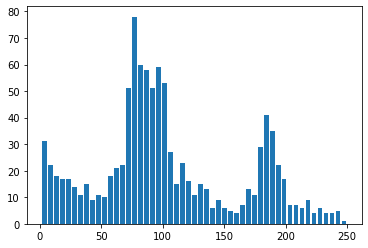

In [101]:
plot_hist(auto_gray[0,:,:], bins=51)

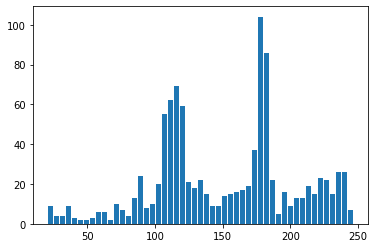

In [102]:
plot_hist(ship_gray[0,:,:], bins=51)

# Test file reading

In [103]:
test_file = "\\test_batch"
test_images, test_cls = load_data(file_path+test_file)

In [104]:
test_images.shape

(10000, 32, 32, 3)

In [113]:
test_auto, test_deer, test_ship = extract_n_images(10, test_cls, test_images)

In [114]:
testauto_gray, testdeer_gray, testship_gray = convert2gray(test_auto, test_deer, test_ship, 10)

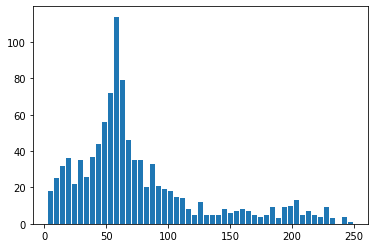

In [119]:
plot_hist(testauto_gray[0,:,:,], bins=51)

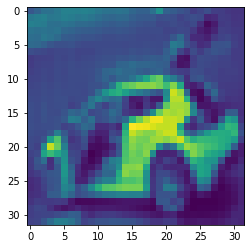

In [120]:
plt.imshow(testauto_gray[0,:,:,])

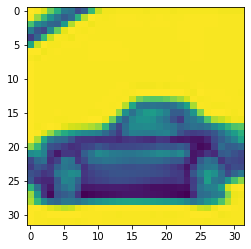

In [178]:
plt.imshow(testauto_gray[7,:,:])

In [121]:
from numpy import linalg as LA

In [202]:
def calc_norm(image,test_class, bins):
    minimum = 0
    clas = 999
    correctness = 0
    l1 = l2 = l3 = 0
    h = plot_hist(image,bins,show_hist=False)
    for i in range(30):
        h1 = plot_hist(auto_gray[i,:,:], bins, show_hist=False)
        h2 = plot_hist(deer_gray[i,:,:], bins, show_hist=False)
        h3 = plot_hist(ship_gray[i,:,:], bins, show_hist=False)
        l1 += LA.norm(h - h1)
        l2 += LA.norm(h - h2)
        l3 += LA.norm(h - h3)
    l1 = l1/30
    l2 = l2/30
    l3 = l3/30
    
    if l3 < l2 and l3 < l1:
        minimum = l3
        clas = 8
    elif l2 < l1 and l2 < l3:
        minimum = l2
        clas = 4
    else:
        minimum = l1
        clas = 1
              
    if clas == test_class:
        correctness += 1
#     print(clas)
    return correctness

In [211]:
correct = 0
for i in range(10):
    correct += calc_norm(testauto_gray[i,:,:],1, bins=20)
    correct += calc_norm(testdeer_gray[i,:,:],4, bins=20)
    correct += calc_norm(testship_gray[i,:,:],8, bins=20)
print(correct)

16


# Total correct images


In [213]:
correct/30 * 100

53.333333333333336

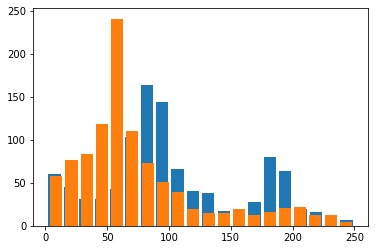

In [212]:
h1 = plot_hist(auto_gray[0,:,:], bins=20, show_hist=True)
h2 = plot_hist(testauto_gray[0,:,:], bins=20, show_hist=True)

In [207]:
LA.norm(h2 - h1)

333.33766663850037

190.824526725471

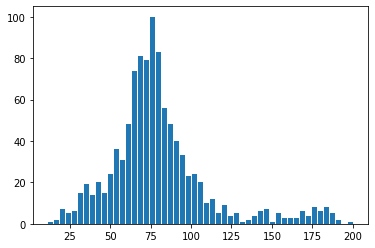

In [199]:
h3 = plot_hist(deer_gray[0,:,:], bins=51, show_hist=True)
LA.norm(h2 - h3)

249.5115227800111

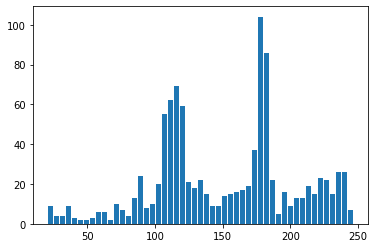

In [200]:
h4 = plot_hist(ship_gray[0,:,:], bins=51)
LA.norm(h2 - h4)